In [65]:
from corus import load_lenta
from nltk.stem import SnowballStemmer
snb_stemmer_ru = SnowballStemmer('russian')
from razdel import sentenize
from razdel import tokenize
import re
import pymorphy2
from nltk.corpus import stopwords
morph = pymorphy2.MorphAnalyzer()
ru_stop_words = stopwords.words('russian')
import time

import pandas as pd
import numpy as np

In [66]:
import re
import nltk

import torch
from torch.utils.data import Dataset, DataLoader, random_split
import torch.nn as nn
import torch.optim as optim

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import LabelEncoder

In [67]:

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
# !wget "https://github.com/yutkin/Lenta.Ru-News-Dataset/releases/download/v1.0/lenta-ru-news.csv.gz"

In [33]:
path = 'lenta-ru-news.csv.gz'

In [34]:
records = load_lenta(path)

In [35]:
next(iter(records))

LentaRecord(
    url='https://lenta.ru/news/2018/12/14/cancer/',
    title='Названы регионы России с\xa0самой высокой смертностью от\xa0рака',
    text='Вице-премьер по социальным вопросам Татьяна Голикова рассказала, в каких регионах России зафиксирована наиболее высокая смертность от рака, сообщает РИА Новости. По словам Голиковой, чаще всего онкологические заболевания становились причиной смерти в Псковской, Тверской, Тульской и Орловской областях, а также в Севастополе. Вице-премьер напомнила, что главные факторы смертности в России — рак и болезни системы кровообращения. В начале года стало известно, что смертность от онкологических заболеваний среди россиян снизилась впервые за три года. По данным Росстата, в 2017 году от рака умерли 289 тысяч человек. Это на 3,5 процента меньше, чем годом ранее.',
    topic='Россия',
    tags='Общество',
    date=None
)

In [36]:
records = load_lenta(path)

In [37]:
lst_politics = []
lst_society = []
lst_sport = []
lst_cultural = []
lst_science = []
lst_economic = []

In [38]:
for i in records:
    
    if i.topic == 'Политика' or i.tags == 'Политика':
        lst_politics.append(i.text)
        
    if i.topic == 'Общество' or i.tags == 'Общество':
        lst_society.append(i.text)
        
    if i.topic == 'Спорт' or i.tags == 'Спорт':
        lst_sport.append(i.text)
        
    if i.topic == 'Культура' or i.tags == 'Культура':
        lst_cultural.append(i.text)
        
    if i.topic == 'Наука' or i.tags == 'Наука' or i.topic == 'Наука и техника' or i.tags == 'Наука и техника':
        lst_science.append(i.text)
        
    if i.topic == 'Экономика' or i.tags == 'Экономика':
        lst_economic.append(i.text)
        

In [39]:
print(f'''
политика: {len(lst_politics)}\n
общество: {len(lst_society)}\n
спорт: {len(lst_sport)}\n
культура: {len(lst_cultural)}\n
наука: {len(lst_science)}\n
экономика: {len(lst_economic)}\n

''')


политика: 33220

общество: 27560

спорт: 64421

культура: 53803

наука: 53136

экономика: 79538





In [40]:
lst_sport = lst_sport[:32000]

In [41]:
lst_cultural = lst_cultural[:32000]
lst_science = lst_science[:32000]
lst_economic = lst_economic[:32000]

In [42]:
print(f'''
политика: {len(lst_politics)}\n
общество: {len(lst_society)}\n
спорт: {len(lst_sport)}\n
культура: {len(lst_cultural)}\n
наука: {len(lst_science)}\n
экономика: {len(lst_economic)}\n

''')


политика: 33220

общество: 27560

спорт: 32000

культура: 32000

наука: 32000

экономика: 32000





In [43]:
pred_politics_lst = []
pred_society_lst = []
pred_sport_lst = []
pred_cultural_lst = []
pred_science_lst = []
pred_economic_lst = []

In [44]:
lst_politics[0]

'С начала расследования российского вмешательства в выборы власти США потратили более 25 миллионов долларов. Об этом сообщает Associated Press со ссылкой на отчет Министерства юстиции США. В документе содержатся данные о расходах на следствие с апреля по сентябрь 2018 года. За эти полгода было потрачено 4,6 миллиона долларов, из которых почти 3\xa0миллиона долларов ушли на зарплату сотрудников, 580 тысяч — на поездки и сопутствующие расходы. Ранее Минюст США уже публиковал отчеты о затратах на дело о российском вмешательстве за предыдущие месяцы. 11 декабря расследование спецпрокурора Робера Мюллера показало, что по меньшей мере 14 человек из окружения президента США Дональда Трампа контактировали с россиянами во время его избирательной кампании и последующего переходного периода перед вступлением в должность главы государства. Мюллер с 2017 года ведет дело о якобы российском вмешательстве в американские выборы в 2016-м. Перед ним поставлена задача выяснить, был ли сговор между штабом 

In [45]:
def predprocessing(lst_in, lst_out):
    cnt = 0
    for i in lst_in:

        ans_str = ''
        tok = list(tokenize(i))
        ru_letters = re.compile('^[а-яА-ЯёЁ]*$')
        pt = [morph.parse(t.text) for t in tok if ru_letters.search(t.text)] 
        lemmed_text = [ru_letters[0].normalized.word for ru_letters in pt]

        for i in lemmed_text:
            if i in ru_stop_words:
                lemmed_text.remove(i)
        for i in lemmed_text:
            ans_str += (i + " ")
        lst_out.append(ans_str)



In [46]:
start_time = time.time()

predprocessing(lst_politics, pred_politics_lst)
predprocessing(lst_society, pred_society_lst)
predprocessing(lst_sport, pred_sport_lst)
predprocessing(lst_cultural, pred_cultural_lst)
predprocessing(lst_science, pred_science_lst)
predprocessing(lst_economic, pred_economic_lst)

print("--- %s seconds ---" % (time.time() - start_time))

--- 5533.072292804718 seconds ---


In [48]:
from collections import Counter

In [49]:
lst_all = []

In [50]:
def to_one_lst(lst):
    for i in lst :
        [lst_all.append(j) for j in i.split()]

In [51]:
to_one_lst(pred_politics_lst)
to_one_lst(pred_society_lst)
to_one_lst(pred_sport_lst)
to_one_lst(pred_cultural_lst)
to_one_lst(pred_science_lst)
to_one_lst(pred_economic_lst)

In [55]:
lst_all[0]

'начало'

In [56]:
pd.Series(lst_all).to_csv('out.csv', index=False)  

In [84]:
pd.Series(lst_all)

0                  начало
1           расследование
2              российский
3           вмешательство
4                  выборы
                ...      
25200029          назвать
25200030              имя
25200031         прокурор
25200032      участвовать
25200033    расследование
Length: 25200034, dtype: object

In [86]:
def create_lookup_tables(words):

    word_counts = Counter(words)
    sorted_vocab = sorted(word_counts, key = word_counts.get, reverse=True)
    int_to_vocab = {i: word for i,word in enumerate(sorted_vocab)}
    vocab_to_int = {word: i for i,word in enumerate(sorted_vocab)}

    return vocab_to_int, int_to_vocab

In [87]:
vocab_to_int, int_to_vocab = create_lookup_tables(lst_all)

In [64]:
pd.Series(pred_politics_lst).to_csv('pred_politics_lst.csv', index=False)
pd.Series(pred_society_lst).to_csv('pred_society_lst.csv', index=False)
pd.Series(pred_sport_lst).to_csv('pred_sport_lst.csv', index=False) 
pd.Series(pred_cultural_lst).to_csv('pred_cultural_lst.csv', index=False)  
pd.Series(pred_science_lst).to_csv('pred_science_lst.csv', index=False)  
pd.Series(pred_economic_lst).to_csv('pred_economic_lst.csv', index=False)  

In [62]:
pd.Series(pred_economic_lst)

0        производитель эвотор проанализировать дать сво...
1        еврокомиссия марош шефчович пригласить россия ...
2        официальный делегация правительство россия при...
3        импортёр спиртной напиток заявить проблема пер...
4        компания уличить использование асбест производ...
                               ...                        
31995    итог третий квартал год фондовый индекс весь м...
31996    федеральный служба финансовый рынок фсфр сентя...
31997    вести переговоры объединение принадлежащий ком...
31998    правительство россия внести госдума проект бюд...
31999    котировка высокотехнологичный компания китай о...
Length: 32000, dtype: object

In [89]:
dicted_data = {
    "category":[],
    "text":[] }

In [90]:
def creating_df(lst, category):
    
    for i in range(len(lst)):
        dicted_data["category"].append(category)
    dicted_data["text"].extend(lst)

In [92]:
creating_df(pred_politics_lst, "politics")
creating_df(pred_society_lst, "society")
creating_df(pred_sport_lst, "sport")
creating_df(pred_cultural_lst, "cultural")
creating_df(pred_science_lst, "science")
creating_df(pred_economic_lst, "economic")

In [93]:
df = pd.DataFrame(dicted_data)
df

,category,text
0,politics,начало расследование российский вмешательство ...
1,politics,минобороны опубликовать видео полёт российский...
2,politics,житель великобритания платить семь евро посеще...
3,politics,россиянка мария бутин судить сша обвинение уча...
4,politics,пентагон проигнорировать обращение министр обо...
...,...,...
188757,economic,итог третий квартал год фондовый индекс весь м...
188758,economic,федеральный служба финансовый рынок фсфр сентя...
188759,economic,вести переговоры объединение принадлежащий ком...
188760,economic,правительство россия внести госдума проект бюд...


/Users/aleksandrtulakov/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'review score')

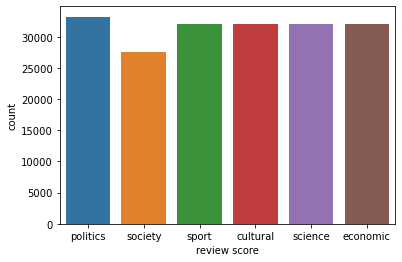

In [103]:
sns.countplot(df["category"])
plt.xlabel('review score')